# Analysis sleep pattern for one person before and after lockdown

Sleep is an essential aspect of our lives. It plays a vital role in maintaining physical health, mental clarity, a positive mindset, and energy levels throughout the day. Nobody can resist how important sleep is, but many people rely on their personal feelings to measure their sleep quality. 

My husband used a sleep tracking ring to seek objective, unbiased insights to understand and improve his sleep. This innovative device monitors various sleep parameters, including sleep stages, heart rate, body temperature, and activity levels. The Oura Ring application offers valuable information on sleep quality, duration, and sleep stages and insights on readiness, activity levels, body temperature, heart rate, recovery, and personalized trends.

Amidst the global COVID-19 pandemic, the world underwent significant changes, including lockdown measures that confined people to their homes. During this period, my husband experienced a shift in his daily routine as he transitioned to remote work. This presented a unique opportunity to analyze and compare his sleep patterns before and after the lockdown.

In this project, I analyze collected data from the sleep tracker and use a simple method and clear visualization to tell a  sleep story.

The project's primary goal is to analyze the sleep pattern, reveal the impact of the lockdown, and provide recommendations for improving sleep. 

To accomplish these aims, let's focus on the following questions:
1. __Does his sleep duration meet the guidelines recommended by health professionals?__ We will explore the sleep duration and compare it to recommended sleep guidelines to determine if they meet it.
2. __What impact has the lockdown had on his sleep and daily activity patterns?__ We will assess any differences by comparing sleep and activity metrics Before and After the lockdown.
3. __What correlations can be found between sleep duration, readiness, sleep, and activity scores?__ We will explore the relationships between variables to identify potential relations or dependencies.


To analyze the sleep patterns effectively, we will take a hierarchical approach. Starting with a general overview, we will examine the yearly trends, followed by monthly variations, and finally, zoom in on weekly patterns. This approach allows us to capture broad trends and specific insights, comprehensively understanding sleep patterns before and after the lockdown period.

- __Exploratory Data Analysis (EDA):__

  - Descriptive Statistics: calculate basic statistical measures.
  - Correlation Analysis: visualize the correlation matrix using a heatmap, where colors indicate the strength of the correlation; specify features with strong positive or negative correlations, indicating potential relationships or dependencies.
  - Finding Outliers: plot box plots to visualize the distribution of features and detect outliers; use statistical methods like the Z-score or interquartile range (IQR) to identify and flag potential outliers; explore outliers', confirming they are not errors or anomalies in the data.
  
  
- __Statistical Analysis:__
  - Perform statistical tests to understand if the difference in sleep patterns Before and After Lockdown is statistically significant
  

- __General Overview:__
  - Calculate basic statistical measures such as each feature's mean and median.
  - Compare sleep patterns, calculate statistical measures for the Before Lockdown and After Lockdown periods.
  - Plot a histogram to visualize the distribution of sleep values.
  - Visualize the BedTime Routine, showing the starts and ends of sleep. 
  


- __Yearly Analysis:__
  - Calculate the average sleep duration for each year.
  - Plot the average sleep scores over the years.
  
  
- __Monthly Analysis:__
  - Plot the average sleep duration of different sleep types over months. 

 
- __Weekly Analysis:__
  - Calculate the average sleep duration for each week across all years.
  - Plot the average sleep duration over the weeks to observe any variations or trends weekly.
  - Plot the average Scores
  
  
- __Summary__
  - The section overviews our key findings, highlighting the changes in sleep patterns before and after the lockdown.


- __Recommendations__
  - This section will offer suggestions to enhance sleep quality.


- __Limitations__
  - This final section acknowledges the study's potential limitations, allowing us to consider the results in light of these restrictions.

By analyzing the sleep data at these levels, we will progressively uncover insights and patterns that may exist. 


## Exploratory Data Analysis
An essential step to get acquainted with the data set is conducting __exploratory data analysis (EDA)__. 
EDA is a first look at the dataset, identifying patterns, detecting outliers, and exploring relationships between features. Also, the EDA process intends to find missing values and other mistakes that require correction during _data cleaning_.  

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import statsmodels.api as sm
import matplotlib.dates as mdates
import scipy.stats as stats
from scipy.stats import wilcoxon


import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date
from datetime import datetime
from pylab import rcParams
from matplotlib import dates

from matplotlib.dates import AutoDateLocator, AutoDateFormatter, date2num
from matplotlib.dates import DayLocator, HourLocator

In [2]:
# Setting the plotting theme
sns.set()

# Setting the size of all plots
plt.rcParams['figure.figsize'] = 20, 8

# Setting the colors
color = ["#4b85a8", "#d98100", "#495464"]

# Setting the background color to solid white
plt.rcParams['axes.facecolor'] = '#F0F0F0'


In [3]:
# Load dataset. Set index to date column
df = pd.read_csv("sleeping_tracking_.csv",
                 index_col=["date"],
                 parse_dates=["date"])

In [4]:
# Inspect data
df.head(2)

,weekdays,sleep_starts,sleep_ends,sleep_duration_min,light_sleep_min,rem_sleep_min,deep_sleep_min,readiness,sleep_score,activity_score,steps
date,,,,,,,,,,,
2019-10-10,Thursday,10:43:00 PM,5:40:00 AM,383,201,93,89,84,77,87,7819
2019-10-11,Friday,11:14:00 PM,6:00:00 AM,359,203,51,104,79,69,87,7819


In [5]:
# Examine the index
df.index

DatetimeIndex(['2019-10-10', '2019-10-11', '2019-10-12', '2019-10-13',
               '2019-10-14', '2019-10-15', '2019-10-16', '2019-10-17',
               '2019-10-18', '2019-10-19',
               ...
               '2021-02-16', '2021-02-17', '2021-02-18', '2021-02-19',
               '2021-02-20', '2021-02-22', '2021-02-23', '2021-02-24',
               '2021-02-27', '2021-02-28'],
              dtype='datetime64[ns]', name='date', length=447, freq=None)

In [6]:
# Print data information
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 447 entries, 2019-10-10 to 2021-02-28
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   weekdays            447 non-null    object
 1   sleep_starts        447 non-null    object
 2   sleep_ends          447 non-null    object
 3   sleep_duration_min  447 non-null    int64 
 4   light_sleep_min     447 non-null    int64 
 5   rem_sleep_min       447 non-null    int64 
 6   deep_sleep_min      447 non-null    int64 
 7   readiness           447 non-null    int64 
 8   sleep_score         447 non-null    int64 
 9   activity_score      447 non-null    int64 
 10  steps               447 non-null    int64 
dtypes: int64(8), object(3)
memory usage: 41.9+ KB


`df.info()` gives as high-level information on the data set. The data set contains __11 columns and 447 rows__. Also, it shows the data type for each feature. All numeric values are set up for `int64` except for two features, `sleep_starts` and `sleep_ends`

In [7]:
# Inspect the missing values
df.isna().sum()

weekdays              0
sleep_starts          0
sleep_ends            0
sleep_duration_min    0
light_sleep_min       0
rem_sleep_min         0
deep_sleep_min        0
readiness             0
sleep_score           0
activity_score        0
steps                 0
dtype: int64

#### Here is no missing value. But if it would be a few, I could use fillna() or dropna() methods.

In [8]:
# Print summary statistics
df.describe()

,sleep_duration_min,light_sleep_min,rem_sleep_min,deep_sleep_min,readiness,sleep_score,activity_score,steps
count,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000
mean,440.519016,262.523490,92.228188,85.297539,81.062640,78.454139,80.765101,9463.791946
std,61.399223,48.921863,25.341467,22.986320,7.383208,6.496776,8.078418,3246.169685
min,290.000000,128.000000,35.000000,9.000000,51.000000,57.000000,54.000000,1299.000000
25%,403.500000,231.000000,76.000000,70.000000,76.000000,75.000000,76.000000,7447.500000
50%,438.000000,260.000000,90.000000,88.000000,82.000000,79.000000,81.000000,9129.000000
75%,473.000000,291.000000,107.000000,101.000000,87.000000,83.000000,86.500000,11069.000000
max,673.000000,538.000000,189.000000,148.000000,96.000000,94.000000,99.000000,28120.000000


In [9]:
df.index.max()

Timestamp('2021-02-28 00:00:00')

In [10]:
df.index.min()

Timestamp('2019-10-10 00:00:00')

The summary statistics provide insights into various variables in the dataset. On average, the `sleep_duration_min` is around 440 min (7 hours 20 minutes), with a standard deviation of approximately 61 minutes (1 hour). The dataset shows variability in `sleep_duration`, ranging from 290 minutes (4 hours 50 minutes) to 673 minutes (11 hours 13 minutes.)

`light_sleep_min` duration averages around 262 minutes (4 hours and 23 minutes), with a standard deviation of about 48 minutes. `rem_sleep_min` lasts approximately 92 minutes (1 hour and 32 minutes), while `deep_sleep_min` lasts around 85 minutes (1 hour and 25 minutes). Both `rem_sleep_min` and `deep_sleep_min` have some variability.

`readiness`, `sleep_score`, and `activity_score` have average values around 80, with slight variations. The number of `steps` taken per day averages around 9,464, with a standard deviation of approximately 3,246.



___________

### Creating a heatmap
Heatmap quickly displays patterns and relationships between numeric variables.

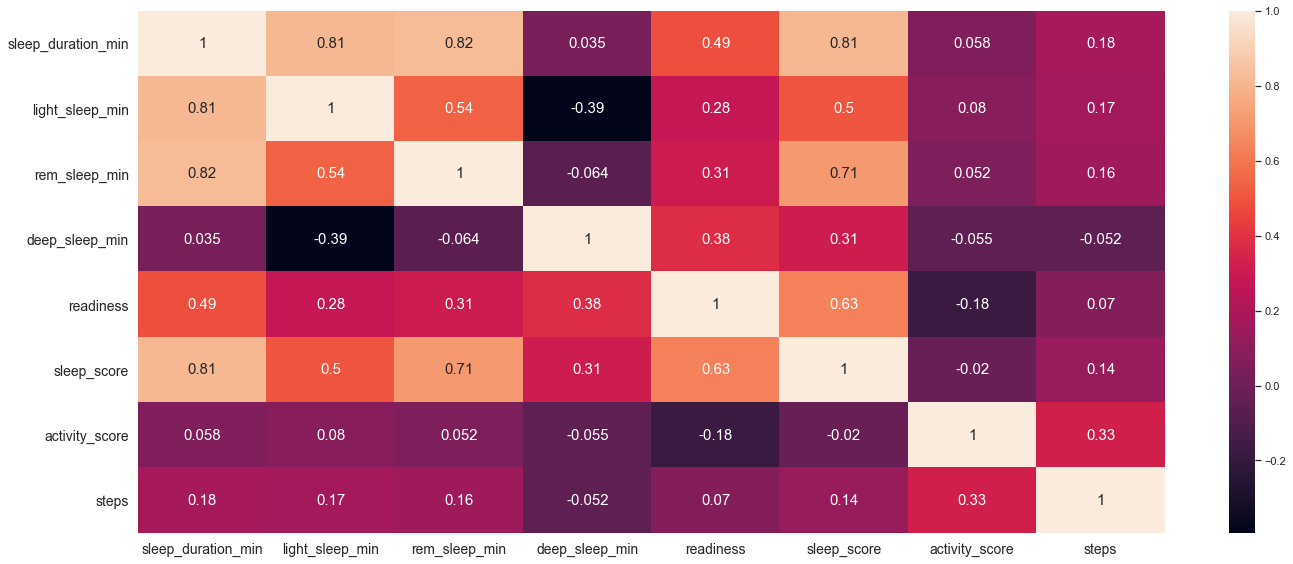

In [11]:
# Get correlation matrix
df_corr = df.corr()

sns.heatmap(df_corr, annot=True, annot_kws={"size": 15})

# Fix ticklabel directions and size
plt.xticks(size = 14, rotation=0)
plt.yticks(size = 14,rotation=0)

# Fits plot area to the plot, "tightly"
plt.tight_layout()


The heatmap visually displays the correlation between the numeric values of the dataset. The heatmap utilizes color coding, where lighter shades indicate a strong correlation, black represents no correlation or negative correlation, and a correlation of 1 indicates a strong positive correlation. Upon a quick examination, it is apparent that `sleep_duration_min` strongly correlates with `light_sleep_min`, `rem_sleep_min`, and `sleep_score` (0.81). Additionally, a __strong correlation__ is observed between `rem_sleep_min` and `sleep_score` (0.71). Interestingly, the correlation between `activity_score` and `steps` is surprisingly __weak__ (0.33).

A correlation coefficient of -0.39 between `light_sleep_min` and `deep_sleep_min` suggests a __moderate negative correlation.__
That means when the duration of light sleep increases, the duration of deep sleep tends to decrease, and vice versa. However, the strength of the correlation is moderate, indicating that the relationship is not extremely strong.

_______________

### Finding outliers
Detecting outliers is essential as they can reveal data errors, provide insights, impact statistical analysis, affect decision-making, and help see anomalies.

__Boxplots__ are effective for detecting outliers and clear visual presentation, robustness to skewness, explicit outlier indicators, and quantitative thresholds based on the interquartile range (IQR). 

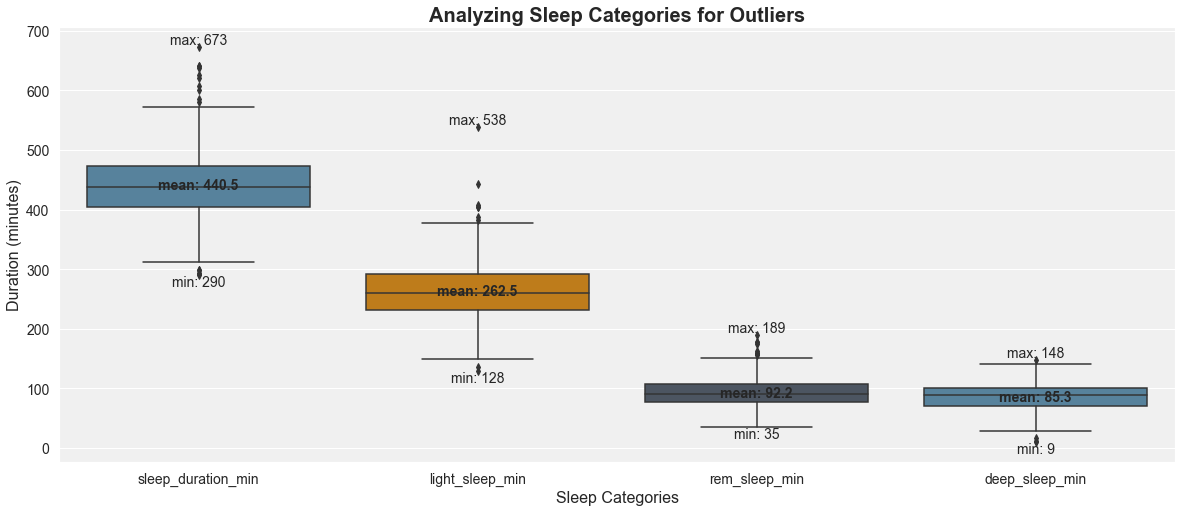

In [12]:
columns = ["sleep_duration_min", "light_sleep_min", "rem_sleep_min", "deep_sleep_min"]
sns.boxplot(data=df[columns], palette = color)

# Set labels
plt.xlabel("Sleep Categories", fontsize=16)
plt.ylabel("Duration (minutes)", fontsize=16)
plt.title("Analyzing Sleep Categories for Outliers", fontsize=20, fontweight='bold')

# Fix ticklabel directions and size
plt.xticks(size = 14, rotation=0)
plt.yticks(size = 14,rotation=0)

# Calculate and display the mean, maximum, and minimum values
means = df[columns].mean()
max_vals = df[columns].max()
min_vals = df[columns].min()

for i in range(len(columns)):
    plt.text(i, max_vals[i], f"max: {max_vals[i]}", ha='center', va='bottom',fontsize = 14)
    plt.text(i, min_vals[i], f"min: {min_vals[i]}", ha='center', va='top',fontsize = 14)
    plt.text(i, means[i], f"mean: {means[i]:.1f}", ha='center', va='center', fontsize = 14, weight= "bold")

# Display the plot
plt.show()

The __boxplot__ displays four columns `sleep_duration_min`, `light_sleep_min`, `rem_sleep_min`, and `deep_sleep_min`. It allows us to observe summary statistics such as the _mean, max, and min_ values for each. 

Individual data points outside the whiskers are indicated as __outliers.__ These outliers may mean that sleep duration varies broadly and differs from the typical range. Identifying these outliers can help understand where sleep duration is significantly long or short and disturbances in sleep patterns.

- The dataset contains __447 rows and 11 columns,__ showing detailed sleep and activity patterns information.

- The average Sleep duration is approximately __7 hours and 20 minutes__ but with significant variables.

- Sleep contains different stages - __Light Sleep, REM Sleep, and Deep Sleep__ - with Light Sleep being the most extended, and REM and Deep Sleep are similar but shorter.

- A moderate __negative correlation__ between Light and Deep Sleep suggests a possible trade-off between these sleep stages.

- Despite good Readiness, Sleep, and Activity scores, a __weak correlation between Activity Score and Steps__ taken indicates other factors influencing activity level.

- __Outliers in Sleep Duration__ may suggest special events or conditions.

______


### Feature Engineering
A typical sleep cycle consists of three primary stages: `light_sleep_min, rem_sleep_min, and deep_sleep_min`. __Deep Sleep takes 13-23%__ of total sleep, __REM Sleep takes 20-25%,__ and __Light Sleep accounts for >50%__ of a typical night of sleep.
_New features_ are created to understand how the Lockdown has affected each stage. 

In [13]:
# Add a new column for the percentage of deep sleep, rem sleep
df["deep_sleep_pct"] = ((df["deep_sleep_min"] / df["sleep_duration_min"]) * 100).round(2)
df["rem_sleep_pct"] = ((df["rem_sleep_min"] / df["sleep_duration_min"]) * 100).round(2)
df["light_sleep_pct"] = ((df["light_sleep_min"] / df["sleep_duration_min"]) * 100).round(2)

### Statistical Analysis

Given that the main goal of this project is to compare sleep patterns __Before and After Lockdown__ (or during the Lockdown, more accurately), it is crucial __to split the dataset into two data frames.__

In [14]:
# Filter the DataFrame for data points before and after the lockdown date
df_before_lockdown = df[df.index < "2020-03-15"]
df_after_lockdown = df[df.index >= "2020-03-15"]


Determining the number of data points available in each dataset is important. This provides an initial understanding of the breadth of data being worked with.

In [15]:
# Count the number of data points Before and After Lockdown
num_before_lockdown = len(df_before_lockdown)
num_after_lockdown = len(df_after_lockdown)

# Print the results
print(f"Number of data points before the lockdown:{num_before_lockdown}\n"
      f"Number of data points after the lockdown: {num_after_lockdown}")

Number of data points before the lockdown:138
Number of data points after the lockdown: 309


The dataset's split shows an __imbalance, with 138 data points recorded Before Lockdown and 309 After Lockdown.__ This inequality could potentially affect the analysis outcomes. 
Given this situation, it becomes critical to conduct __a statistical test.__ This process will show if the two data sets (Before and After Lockdown) are genuinely different, making a comparative analysis meaningful and correct.

__The hypotheses for this analysis are described as follows:__
 - __Null Hypothesis (H0):__ No significant difference exists in sleep patterns Before and After Lockdown.

 - __Alternative Hypothesis (HA):__ There is a significant difference in sleep patterns Before and After Lockdown.

A significant result from the statistical test _(with a p-value less than 0.05)_ would suggest rejecting the Null Hypothesis (H0), meaning there is __a significant difference__ in sleep patterns Before and After Lockdown.
 
However, before running a statistical test should verify whether the datasets follow a __normal distribution.__ For that purpose, the __Shapiro-Wilk test__ is utilized. This test is preferred due to its robustness and accuracy, even when handling smaller sample sizes.




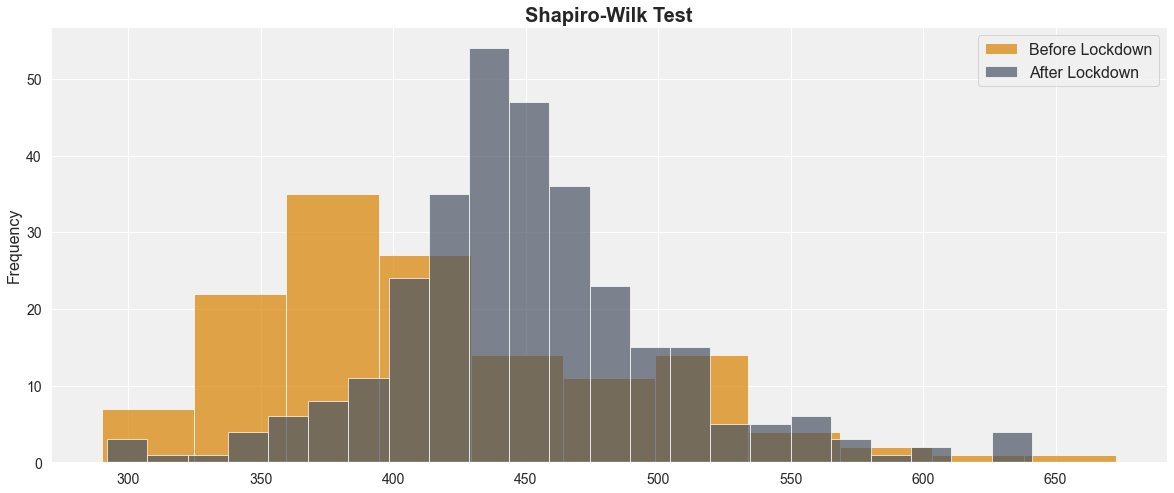

Shapiro-Wilk Test p-values:
Before Lockdown: 6.099900565459393e-05
After Lockdown: 1.5513437290337606e-07


In [16]:
# Shapiro-Wilk test for normality
_, p_value_before = stats.shapiro(df_before_lockdown["sleep_duration_min"])
_, p_value_after = stats.shapiro(df_after_lockdown["sleep_duration_min"])

# Histogram
plt.hist(df_before_lockdown["sleep_duration_min"], bins="auto", color=color[1], alpha=0.7, label="Before Lockdown")
plt.hist(df_after_lockdown["sleep_duration_min"], bins="auto", color=color[2], alpha=0.7, label="After Lockdown")

# Set labels
plt.ylabel("Frequency", fontsize = 16)
plt.title("Shapiro-Wilk Test", fontsize=20, fontweight='bold')


# Fix ticklabel directions and size
plt.xticks(size = 14, rotation=0)
plt.yticks(size = 14,rotation=0)
plt.legend(fontsize = 16)

plt.show()

# Print Shapiro-Wilk test p-values
print(f"Shapiro-Wilk Test p-values:\n"
      f"Before Lockdown: {p_value_before}\n"
      f"After Lockdown: {p_value_after}")


The Shapiro-Wilk test p-values __Before Lockdown (6.10e-05) and After Lockdown (1.55e-07)__ are significantly less than the established 0.05 threshold. This leads us __to reject the null hypothesis__ of the Shapiro-Wilk test that assumes a normal distribution, suggesting that the sleep patterns during these periods __do not follow a normal distribution.__

As a result of this finding, parametric tests like a paired t-test, which assume a normal distribution, would not be suitable. Instead, we should apply a non-parametric equivalent for analyzing related samples.

An option for this would be the __Wilcoxon Signed-Rank Test__. This test, often used as a non-parametric alternative to the paired t-test, does not require the assumption of normal distribution and is, therefore, a fitting choice for the sleep pattern data analysis.

In [17]:
# Select the corresponding data points
before_lockdown = df_before_lockdown["sleep_duration_min"][:num_before_lockdown]
after_lockdown = df_after_lockdown["sleep_duration_min"][:num_before_lockdown]

# Conduct the Wilcoxon Signed-Rank Test
w, p = wilcoxon(before_lockdown, after_lockdown)

print(f"The Wilcoxon Signed-Rank Test returns a p-value of {p}")

The Wilcoxon Signed-Rank Test returns a p-value of 0.0010561163333003098


In [18]:
# List of columns to compare
columns = ["sleep_duration_min", "light_sleep_min", "rem_sleep_min", "deep_sleep_min", 
           "readiness", "sleep_score", "activity_score", "steps"]

# Create an empty DataFrame to store the results
wilcoxon_test = pd.DataFrame(columns=["column", "w-statistic", "p-value"])

# Perform the Wilcoxon Signed-Rank Test for each column
for column in columns:
    before_lockdown = df_before_lockdown[column][:num_before_lockdown]
    after_lockdown = df_after_lockdown[column][:num_before_lockdown]

    # Conduct the Wilcoxon Signed-Rank Test
    w, p = wilcoxon(before_lockdown, after_lockdown)

    # Determine if the difference is statistically significant
    significant = "Yes" if p < 0.05 else "No"

    # Append the results to the DataFrame
    wilcoxon_test = wilcoxon_test.append({"column": column, "w-statistic": w, "p-value": p, 
                                    "significant": significant}, ignore_index=True)

# Print the results
wilcoxon_test


,column,w-statistic,p-value,significant
0,sleep_duration_min,3254.5,0.001056,Yes
1,light_sleep_min,2937.0,0.000078,Yes
2,rem_sleep_min,2822.5,0.000104,Yes
3,deep_sleep_min,2670.5,0.000016,Yes
4,readiness,2772.0,0.000238,Yes
5,sleep_score,2784.0,0.000265,Yes
6,activity_score,3495.0,0.030882,Yes
7,steps,2831.5,0.000030,Yes


Based on wilcoxon_test table results, the lockdown period has significantly impacted various sleep-related variables, including light sleep duration, REM sleep duration, deep sleep duration, readiness score, sleep score, activity score, and steps count.

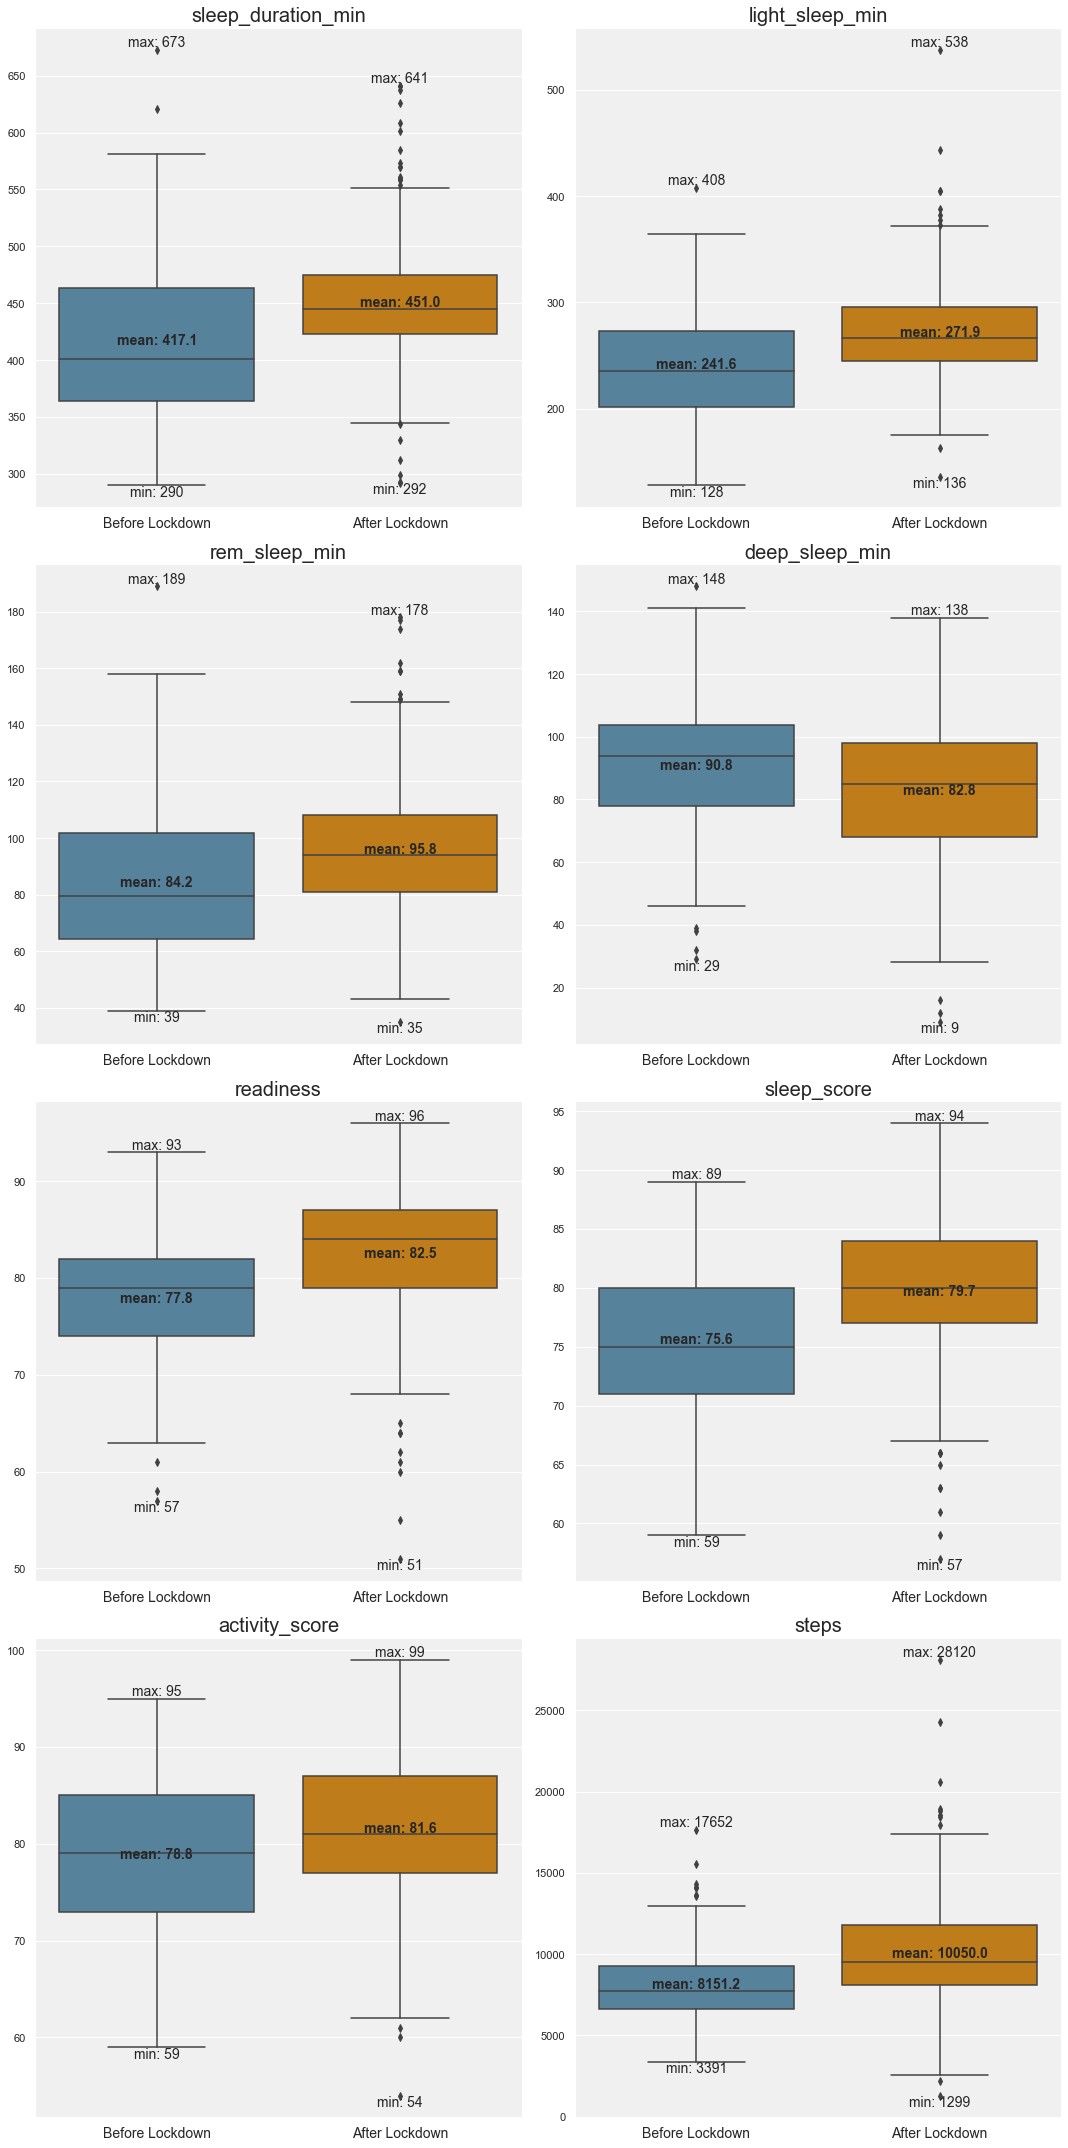

In [19]:
# Calculate the number of rows needed for subplots
num_rows = int(np.ceil(len(columns)/2))

# Create subplots in a grid of 2 columns
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 30))

# Flatten the axes array to iterate over it
axs = axs.flatten()

# For each category
for i, column in enumerate(columns):
    # Prepare data
    data = [df_before_lockdown[column], df_after_lockdown[column]]

    # Generate box plot on specific subplot
    box_plot = sns.boxplot(data=data, palette=color, ax=axs[i])

    # Set title and labels
    box_plot.set_title(column, fontsize=20)
    box_plot.set_xticklabels(['Before Lockdown', 'After Lockdown'], size = 14)

    # Display the mean, maximum, and minimum values
    means = [df_before_lockdown[column].mean(), df_after_lockdown[column].mean()]
    max_vals = [df_before_lockdown[column].max(), df_after_lockdown[column].max()]
    min_vals = [df_before_lockdown[column].min(), df_after_lockdown[column].min()]

    box_plot.text(0, max_vals[0], f"max: {max_vals[0]}", ha='center', va='bottom',fontsize = 14)
    box_plot.text(0, min_vals[0], f"min: {min_vals[0]}", ha='center', va='top',fontsize = 14)
    box_plot.text(0, means[0], f"mean: {means[0]:.1f}", ha='center', va='center', fontsize = 14, weight= "bold")

    box_plot.text(1, max_vals[1], f"max: {max_vals[1]}", ha='center', va='bottom',fontsize = 14)
    box_plot.text(1, min_vals[1], f"min: {min_vals[1]}", ha='center', va='top',fontsize = 14)
    box_plot.text(1, means[1], f"mean: {means[1]:.1f}", ha='center', va='center', fontsize = 14, weight= "bold")



# Tight layout for better spacing
plt.tight_layout()
plt.show()


Data visualizations functions were created to simplify the interpretation of sleep data and improve code efficiency and reusability.

- Converting time: `converting_minutes_to_hours` converts sleep durations from minutes into hours and minutes. 
- Data visualization: `plot_bar`, `plot_line`, and `plotting_distplots` visualize the data's patterns, trends, and distributions.

These functions reduce __repetitive code__, making the analysis process more efficient and the code reusable.

To simplify understanding of data, let's create a function for converting minutes into minutes and hours.

In [20]:
def converting_minutes_to_hours(minutes):
    """Get the minutes and convert to hours and minutes

    Args:
      minutes (int): The integer amount of minutes

    Returns:
      str: The formatted string representing hours and minutes
    """
    h = minutes // 60
    m = minutes % 60
    w = f"{int(h)}h:{int(m)}m"
    return (w)

To easily calculate and print _the average sleep duration_ for different sleep types `average_sleep_duration` function was created. The function takes a specific sleep column's mean value and presents it in a more readable format. The `average_sleep_duration` function internally calls the `converting_minutes_to_hours function`, which converts the average sleep duration into hours and minutes format. This conversion helps to present the results more precisely.

In [21]:
def plot_bar(data, xlabel, ylabel, title, period):
    """Get the data and plot vertical bars

    Args:
      data (pandas DataFrame): The DataFrame with specific columns to plot.
      xlabel (str): The label for x axis.
      ylabel (str): The label for y axis.
      title (str): The title for the plot.
      period (strftime) : The period of time


    Returns:
      plot bars
    """
    # Plotting data
    ax = data.plot.bar(color=[color[0], color[1], color[2]])
    

    # Set labels and legend
    ax.set_xticklabels(data.index.strftime(period), rotation=0, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.set_title(title, fontsize=20)

    ax.legend(loc='best')
    plt.rc('legend', fontsize=13)

    # Patches is everything inside of the chart
    for rect in ax.patches:
        # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

        # The height of the bar is the data value and can be used as the label
        label_text = f'{height:.0f}'

        # ax.text(x, y, text)
        label_x = x + width/2
        label_y = y + height/2

        # plot only when height is greater than specified value
        if height > 0:
            ax.text(
                label_x,
                label_y,
                label_text,
                ha='center',
                va='center',
                fontsize=13
                )


In [22]:
def plot_line(data, xlabel, ylabel, title,convert_to_hours=False):
    """Get the data and plot it in lines

    Args:
      data (pandas DataFrame): The data to plot.
      xlabel (str): The label for x axis.
      ylabel (str): The label for y axis.
      title (str): The title for the plot.
      labels (dict, optional): Custom labels for the line plots; defaults to None. 
      convert_to_hours (bool, optional): Whether to convert values into hours and minutes; defaults to False.

    Returns:
      plot
    """

    # Plotting data
    
    ax = data.plot.line(grid="white",marker='o', markersize=7, linewidth=2, color=color)

    # Set axis labels and legend
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.set_title(title, fontsize=20)
    
    # Set tick label
    plt.xticks(size = 14, rotation=0)
    plt.yticks(size = 14,rotation=0)

    # Add a red vertical line for pointing when lockdown started
    x = "2020-03-15"
    ax.axvline(x, color="red")
    trans = ax.get_xaxis_transform()
    plt.text(x, .05, 'Lockdown Started', transform=trans)
    ax.axvline(x="2020-03-15", color="red")

    ax.legend(loc='best')
    plt.rc('legend', fontsize=13)

   # Add labels to line plots
    for col in data.columns:
        for x, y in zip(data.index, data[col]):
            if convert_to_hours:
                value = converting_minutes_to_hours(y)
            else:
                value = y
            if pd.notnull(value):
                value_label = f"{value}" if convert_to_hours else str(value)
                ax.annotate(value_label, (x, y),
                             textcoords="offset points",
                             xytext=(1, 10),
                             ha='center',fontsize=12)

    plt.show()


In [23]:
def plotting_distplots(data,title,ncols):
    """Get the data and plot distplot with median and mean

    Args:
      data (pandas DataFrame): The DataFrame with specific columns to plot.


    Returns:
      distplot
    """
    # Initalize a figure and axes
    fig, axes = plt.subplots(ncols=ncols, nrows=1)
    fig.suptitle(title, fontsize=20)

    # Plot the data
    for i, col in enumerate(data.columns):
        sns.histplot(data[col], ax=axes[i], color=color[2], alpha=0.5)
        
        axes[i].axvline(
              x=data[col].median(),
              color="#d98100",
              label="Median: " + str(int(data[col].median())),
              linestyle='--', linewidth=2
              )

        axes[i].axvline(
              x=data[col].mean(),
              color="#d98100",
              label="Mean: " + str(int(data[col].mean())),
              linestyle='-',
              linewidth=2
              )

        axes[i].legend()

    plt.show()

# GENERAL OVERVIEW

##  Does the person have enough sleep?

The sleep range for adults (26-64 years old)  remains __7-9 hours or 420 - 540 minutes__. [How Much Sleep Do We Really Need?](https://www.sleepfoundation.org/press-release/national-sleep-foundation-recommends-new-sleep-times)
\
Also, deep and REM sleep are crucial stages. __REM__ sleep constitutes of __20-25%__ of total sleep. While __deep__ sleep takes __13-23%__ of total sleep

### Analyzing Sleep Duration: examining REM, deep, light, and total sleep

In [24]:
def average_sleep_duration(data, column, kind):
    """Get the mean of a column
       and convert the result from minutes to hours and minutes

    Args:
      column (pandas Series): The data to calculate.
      kind (str): The kind of sleep

    Returns:
      str
    """
    # Calculating average sleep duration
    average_sleep_duration_column = data[column].mean()

    # Converting minutes to hours
    a = converting_minutes_to_hours(average_sleep_duration_column)
    # Print average sleep duration

    print (f"Average {kind} sleep is {a}")


In [25]:
# Calculate average duration of sleep for all periods
average_sleep_duration(df, "sleep_duration_min", kind="duration")
average_sleep_duration(df, "deep_sleep_min", kind="deep")
average_sleep_duration(df, "rem_sleep_min", kind="REM")
average_sleep_duration(df, "light_sleep_min", kind="light")


Average duration sleep is 7h:20m
Average deep sleep is 1h:25m
Average REM sleep is 1h:32m
Average light sleep is 4h:22m


From the summary statistics above `df.describe()`, we have already glanced at the average sleep duration. Now, let's delve deeper into this part. 
- The __average sleep duration is 7 hours 21 minutes__, which falls within the recommended range of 7-9 hours for adults aged 18-64, as the National Sleep Foundation suggested.
- __Average deep sleep is 1 hour 25 min__, within a typical range of 1 to 1.5 hours. Deep sleep is essential for physical restoration, memory consolidation, and sleep quality. 
- __An average REM sleep duration of 1 hour and 32 minutes__ is generally considered within a healthy range. REM (Rapid Eye Movement) sleep is a critical stage of the sleep cycle associated with dreaming, memory consolidation, and emotional processing. Adults spend approximately 20-25% of their total sleep time in REM sleep. While no universally specified "good" or "bad" duration exists for REM sleep, a range of 1 to 2 hours is commonly observed for healthy adults. 
- The average duration of light sleep varies among individuals, but it commonly falls within the range of 4 to 6 hours for adults. Light sleep is an important stage of the sleep cycle that facilitates transitions between wakefulness and deeper sleep stages.
An average __light sleep duration of 4 hours and 23 minutes__ is typical for healthy adults. 

In [26]:
# Average sleep duration for the entire period
average_sleep = df["sleep_duration_min"].mean()

# Average sleep duration before lockdown
average_sleep_before = df_before_lockdown["sleep_duration_min"].mean()

# Average sleep duration after lockdown
average_sleep_after = df_after_lockdown["sleep_duration_min"].mean()

print(f"The average sleep duration for the entire time period is {int(average_sleep)} min"
      f"or {converting_minutes_to_hours(average_sleep)}. \n"
      f"Before the lockdown, the average time was {int(average_sleep_before)} "
      f"or {converting_minutes_to_hours(average_sleep_before)}. \n"
      f"However, after the lockdown, the time increased to {int(average_sleep_after)} min"
      f" or {converting_minutes_to_hours(average_sleep_after)}"
      f" which is longer by {round(average_sleep_after - average_sleep_before)} minutes.")

The average sleep duration for the entire time period is 440 minor 7h:20m. 
Before the lockdown, the average time was 417 or 6h:57m. 
However, after the lockdown, the time increased to 450 min or 7h:30m which is longer by 34 minutes.


__Reminder:__  Deep sleep takes __13-23%__ of total sleep.

In [27]:
# The average percentage of deep sleep
avg_deep_pct = df['deep_sleep_pct'].mean()

# The average percentage of deep sleep before lockdown
avg_deep_before_pct = df_before_lockdown['deep_sleep_pct'].mean()

# The average percentage of deep sleep after lockdown
avg_deep_after_pct = df_after_lockdown['deep_sleep_pct'].mean()

print(
    f"The average percentage of deep sleep is {int(avg_deep_pct)}%.\n"
    f"Before lockdown, percentage was {int(avg_deep_before_pct)}%,\n"
    f"but after lockdown average percent of deep sleep decreased "
    f"and equaled {int(avg_deep_after_pct)}% of total sleep duration."
      )


The average percentage of deep sleep is 19%.
Before lockdown, percentage was 22%,
but after lockdown average percent of deep sleep decreased and equaled 18% of total sleep duration.


__Reminder:__ REM sleep takes  __20-25%__ of total sleep.

In [28]:
# The average percentage of REM sleep
avg_rem_pct = df['rem_sleep_pct'].mean()

# The average percentage of REM sleep before lockdown
avg_rem_before_pct = df_before_lockdown['rem_sleep_pct'].mean()

# The average percentage of REM sleep after lockdown
avg_rem_after_pct = df_after_lockdown['rem_sleep_pct'].mean()

print(
    f"The average percentage of REM sleep is {int(avg_rem_pct)}%. "
    f"Before lockdown, the average percentage was "
    f"{int(avg_rem_before_pct)}%,\n"
    f"but after lockdown average percent of REM sleep increased to "
    f"{int(avg_rem_after_pct)}%"
    f" of total sleep.")


The average percentage of REM sleep is 20%. Before lockdown, the average percentage was 19%,
but after lockdown average percent of REM sleep increased to 21% of total sleep.


Based on the intermediate analysis of sleep patterns, the __average percentage of Deep Sleep is 19%,__ which is in the necessary _range of 13-23 % of total sleep_. Deep sleep is associated with physical restoration and rejuvenation.
__Before Lockdown__, the average percentage of __Deep Sleep was at 22%.__ However, __After Lockdown,__ there was a slight decrease in the average percentage of Deep Sleep, which __equaled 18% of the total Sleep duration__, but still within the acceptable range. This decrease may indicate changes in sleep patterns or factors that influenced the quality of Deep Sleep After Lockdown. 

The __REM Sleep average percentage is 20%__, in the proper _range of 20-25% of total sleep._ Before the Lockdown, the average percentage of REM sleep was 19%, indicating a relatively balanced distribution of REM sleep during that time. Interestingly, After the Lockdown, there was an increase in the average percentage of REM sleep, reaching 21% of the total sleep duration, which can have positive implications for cognitive processes and overall sleep quality.

### Analysis of sleep score, activity score, and readiness

Readiness Score ranges from 0 to 100. It provides a quick assessment of a person's current state and the need for recovery and rest:
- 85 or higher: Optimal
- 70-84: Good, the person has recovered well enough
- Under 70: Pay attention; the person is not fully recovered

In [29]:
# Calculate average scores for sleep, activity, and readiness
avg_sleep_score = df['sleep_score'].mean()
avg_sleep_score_before = df_before_lockdown['sleep_score'].mean()
avg_sleep_score_after = df_after_lockdown['sleep_score'].mean()

avg_activity_score = df['activity_score'].mean()
avg_activity_score_before = df_before_lockdown['activity_score'].mean()
avg_activity_score_after = df_after_lockdown['activity_score'].mean()

avg_readiness_score = df['readiness'].mean()
avg_readiness_score_before = df_before_lockdown['readiness'].mean()
avg_readiness_score_after = df_after_lockdown['readiness'].mean()

avg_steps = df['steps'].mean()
avg_steps_before = df_before_lockdown['steps'].mean()
avg_steps_after = df_after_lockdown['steps'].mean()

# Create a DataFrame for the average scores
data = {
    'avg_sleep_score': [avg_sleep_score, avg_sleep_score_before, avg_sleep_score_after],
    'avg_activity_score': [avg_activity_score, avg_activity_score_before, avg_activity_score_after],
    'avg_readiness_score': [avg_readiness_score, avg_readiness_score_before, avg_readiness_score_after],
    'avg_steps': [avg_steps, avg_steps_before, avg_steps_after]
}

index = ['Overall', 'Before Lockdown', 'After Lockdown']

average_scores_df = pd.DataFrame(data, index=index).round(1)


In [30]:
# Display the table
average_scores_df

,avg_sleep_score,avg_activity_score,avg_readiness_score,avg_steps
Overall,78.5,80.8,81.1,9463.8
Before Lockdown,75.6,78.8,77.8,8151.2
After Lockdown,79.7,81.6,82.5,10050.0


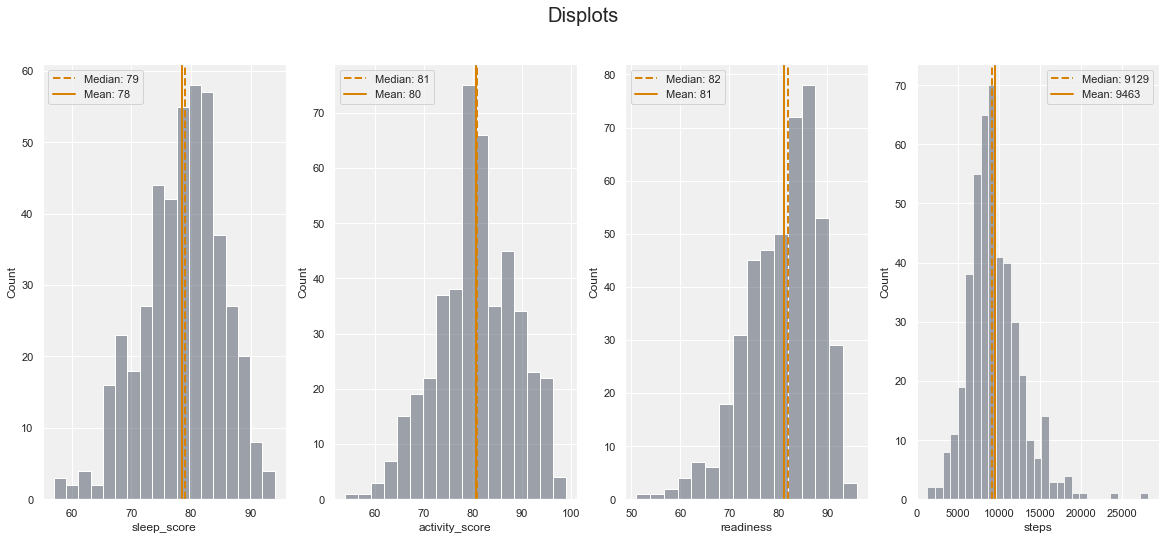

In [31]:
# Plot displots for sleep, activity and readiness scores
plotting_distplots(df[["sleep_score", "activity_score", "readiness","steps"]], "Displots",4)


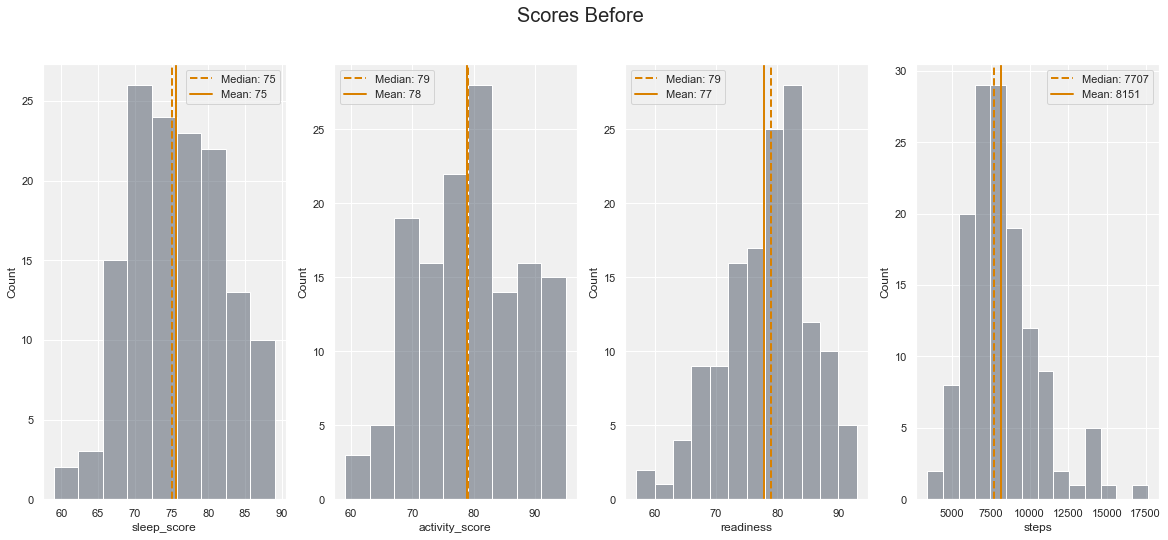

In [32]:
# Plot displots for sleep, activity and readiness scores
plotting_distplots(df_before_lockdown[["sleep_score", "activity_score", "readiness","steps"]],"Scores Before ",4)

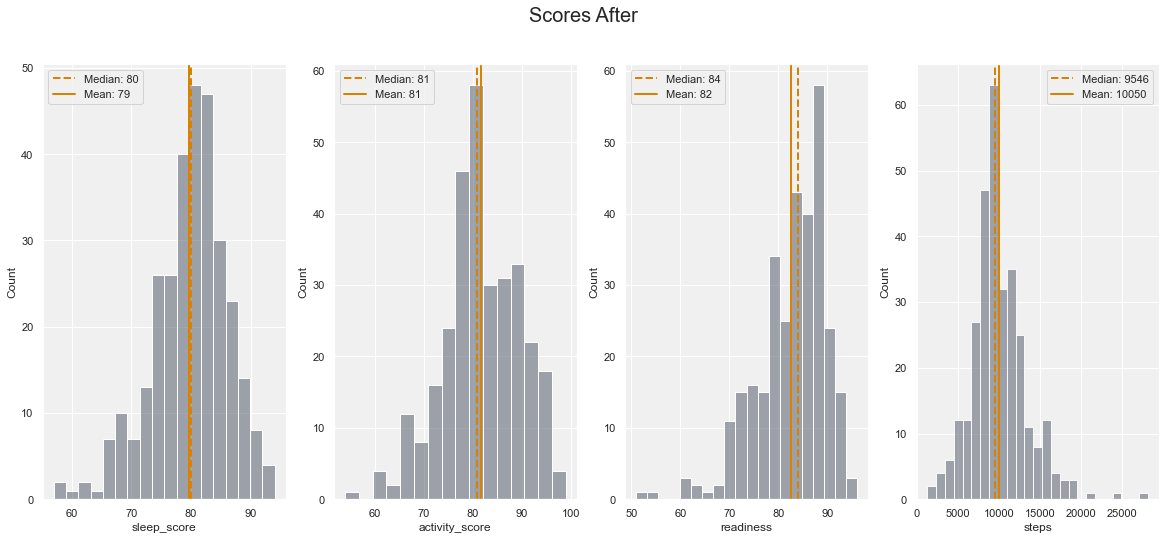

In [33]:
# Plot displots for sleep, activity and readiness scores
plotting_distplots(df_after_lockdown[["sleep_score", "activity_score", "readiness","steps"]], "Scores After",4)

__Based on the provided data, the average Sleep Score is 78%, the average Activity Score is 80.8%, and the average Readiness Score is 81.1%.__

Before the lockdown, the average Sleep Score was 75%, the average Activity Score was 78.8%, and the average Readiness Score was 77.8%.

However, After the Lockdown, there was an improvement in all scores. The average Sleep Score increased to 79.7%, suggesting better sleep quality. The average Activity Score increased to 81.6%, indicating higher physical activity levels. The average Readiness score increased to 82.5%, suggesting a higher state of alertness and preparedness.
These improvements in scores After the Lockdown indicate positive changes in sleep quality, activity levels, and overall readiness.

_But it's important to note that all scores Before and After Lockdown lie between 75 and 84, which is considered Good and means that person rests well enough. But it is still room for improvement to transfer into a higher range of 85 and higher which is Optimal._


### Bed time routine

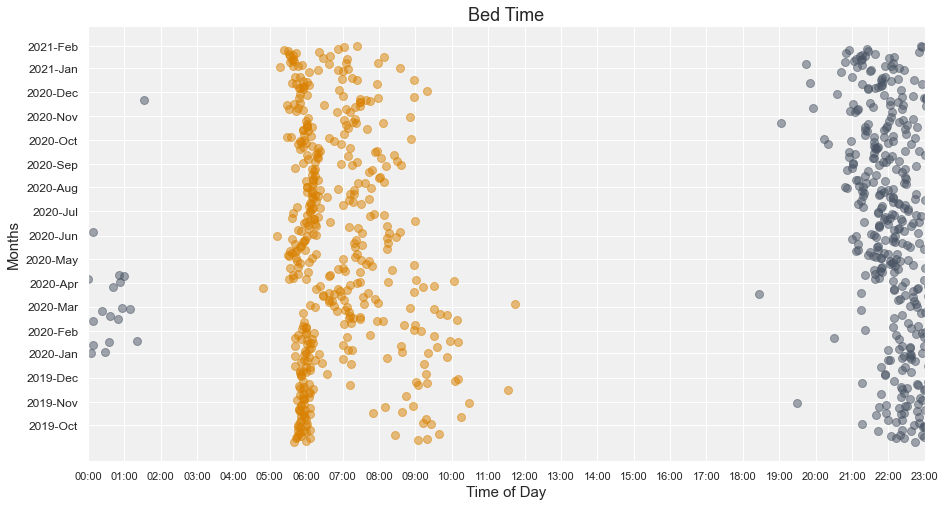

In [34]:
# Convert start and end times to numerical values
start_of_sleep = mdates.datestr2num(df["sleep_starts"])
end_of_sleep = mdates.datestr2num(df["sleep_ends"])

# Create the plot
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the start and end times
plt.plot_date(start_of_sleep, df.index, color=color[2], alpha=0.5, marker='o', markersize=8)
plt.plot_date(end_of_sleep, df.index,color=color[1],alpha=0.5, marker='o', markersize=8)

# Set the format of the major x-ticks
majorFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.xaxis.set_major_formatter(majorFmt)

# Set x-axis limits from 00:00 to 23:00
ax.set_xlim(mdates.datestr2num("00:00"), mdates.datestr2num("23:00"))

# Set labels and legend
months = pd.date_range(start=df.index[0], end=df.index[-1], freq='M').strftime('%Y-%b')
ytick_positions = pd.date_range(start=df.index[0], end=df.index[-1], freq='M')
ax.set_yticks(ytick_positions)
ax.set_yticklabels(months, rotation=0, fontsize=12)

ax.set_xlabel("Time of Day", fontsize=15)
ax.set_ylabel("Months", fontsize=15)
ax.set_title("Bed Time", fontsize=18)

plt.show()


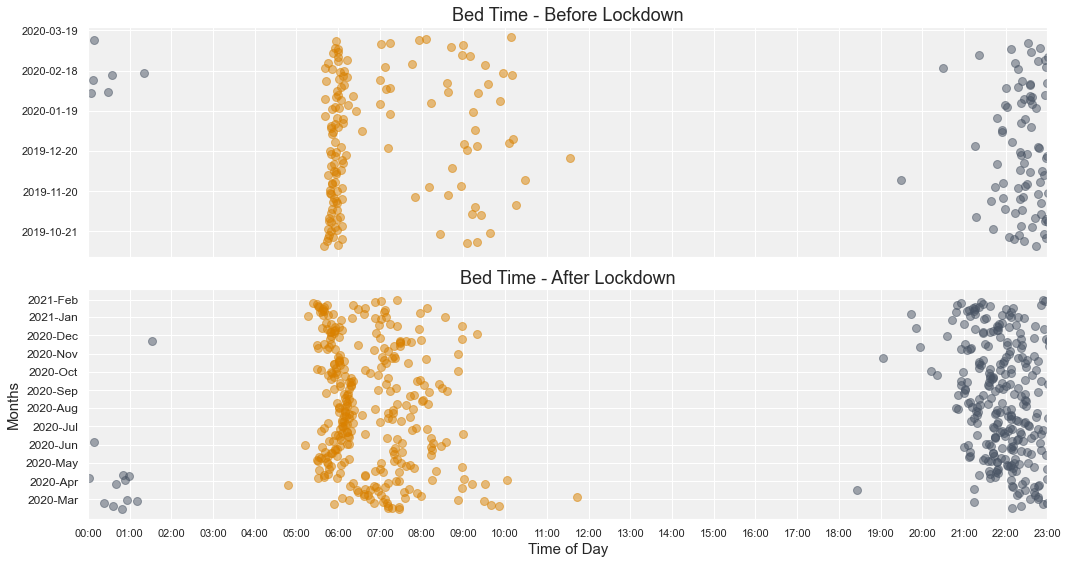

In [35]:
# Convert start and end times to numerical values
start_of_sleep_before = mdates.datestr2num(df_before_lockdown["sleep_starts"])
end_of_sleep_before = mdates.datestr2num(df_before_lockdown["sleep_ends"])
start_of_sleep_after = mdates.datestr2num(df_after_lockdown["sleep_starts"])
end_of_sleep_after = mdates.datestr2num(df_after_lockdown["sleep_ends"])

# Create two plots: Before Lockdown and After Lockdown
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

# Plot the start and end times before lockdown
ax1.plot_date(start_of_sleep_before, df_before_lockdown.index,color=color[2], alpha=0.5, marker='o', markersize=8)
ax1.plot_date(end_of_sleep_before, df_before_lockdown.index,color=color[1],alpha=0.5, marker='o', markersize=8)
ax1.set_title("Bed Time - Before Lockdown", fontsize=18)

# Plot the start and end times after lockdown
ax2.plot_date(start_of_sleep_after, df_after_lockdown.index,color=color[2], alpha=0.5, marker='o', markersize=8)
ax2.plot_date(end_of_sleep_after, df_after_lockdown.index,color=color[1],alpha=0.5, marker='o', markersize=8)
ax2.set_title("Bed Time - After Lockdown", fontsize=18)

# Set the format of the major x-ticks
majorFmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_locator(mdates.HourLocator())
ax1.xaxis.set_major_formatter(majorFmt)
ax2.xaxis.set_major_locator(mdates.HourLocator())
ax2.xaxis.set_major_formatter(majorFmt)

# Set x-axis limits from 00:00 to 23:00
ax1.set_xlim(mdates.datestr2num("00:00"), mdates.datestr2num("23:00"))
ax2.set_xlim(mdates.datestr2num("00:00"), mdates.datestr2num("23:00"))

# Set y-axis format for both plots
ax1.yaxis.set_major_locator(plt.MaxNLocator(6))
ax2.yaxis.set_major_locator(plt.MaxNLocator(6))

# Set labels and legend for the last plot
months = pd.date_range(start=df_after_lockdown.index[0], end=df_after_lockdown.index[-1], freq='M').strftime('%Y-%b')
ytick_positions = pd.date_range(start=df_after_lockdown.index[0], end=df_after_lockdown.index[-1], freq='M')
ax2.set_yticks(ytick_positions)
ax2.set_yticklabels(months, rotation=0, fontsize=12)
ax2.set_xlabel("Time of Day", fontsize=15)
ax2.set_ylabel("Months", fontsize=15)

plt.tight_layout()
plt.show()


In [36]:
# Create new DataFrames
df_before_lockdown = df[df.index < "2020-03-15"].copy()
df_after_lockdown = df[df.index >= "2020-03-15"].copy()

# Convert "sleep_starts" and "sleep_ends" columns to datetime format
df_before_lockdown.loc[:, "sleep_starts"] = pd.to_datetime(df_before_lockdown["sleep_starts"])
df_before_lockdown.loc[:, "sleep_ends"] = pd.to_datetime(df_before_lockdown["sleep_ends"])
df_after_lockdown.loc[:, "sleep_starts"] = pd.to_datetime(df_after_lockdown["sleep_starts"])
df_after_lockdown.loc[:, "sleep_ends"] = pd.to_datetime(df_after_lockdown["sleep_ends"])

# Calculate the most common start and end sleep times for Before Lockdown
most_common_start_time_before = df_before_lockdown["sleep_starts"].dt.strftime("%H:%M").mode()[0]
most_common_end_time_before = df_before_lockdown["sleep_ends"].dt.strftime("%H:%M").mode()[0]

# Calculate the most common start and end sleep times for After Lockdown
most_common_start_time_after = df_after_lockdown["sleep_starts"].dt.strftime("%H:%M").mode()[0]
most_common_end_time_after = df_after_lockdown["sleep_ends"].dt.strftime("%H:%M").mode()[0]

print("Before Lockdown:")
print(f"Most common start sleep time: {most_common_start_time_before}")
print(f"Most common end sleep time: {most_common_end_time_before}")

print("\nAfter Lockdown:")
print(f"Most common start sleep time: {most_common_start_time_after}")
print(f"Most common end sleep time: {most_common_end_time_after}")


Before Lockdown:
Most common start sleep time: 22:35
Most common end sleep time: 06:00

After Lockdown:
Most common start sleep time: 22:08
Most common end sleep time: 06:01


Before the Lockdown, the most common time to __fall asleep was 22:35__, and the usual waking up time was 06:00. This shows a relatively consistent sleep routine. 

However, After Lockdown changed these patterns slightly. After the Lockdown, the most common time to go to sleep __shifted earlier to 22:08__, while the most common time to wake up remained almost unchanged at 06:01.

# Yearly Analysis

In [37]:
# Convert the index to datetime format if it's not already
df.index = pd.to_datetime(df.index)

# Extract the year from the index
df['year'] = df.index.year

# Count the number of unique days with data for each year
days_with_data = df.groupby('year').size()

# Print the results
for year, count in days_with_data.items():
    print(f"Year {year}: {count} days with data")

Year 2019: 70 days with data
Year 2020: 327 days with data
Year 2021: 50 days with data


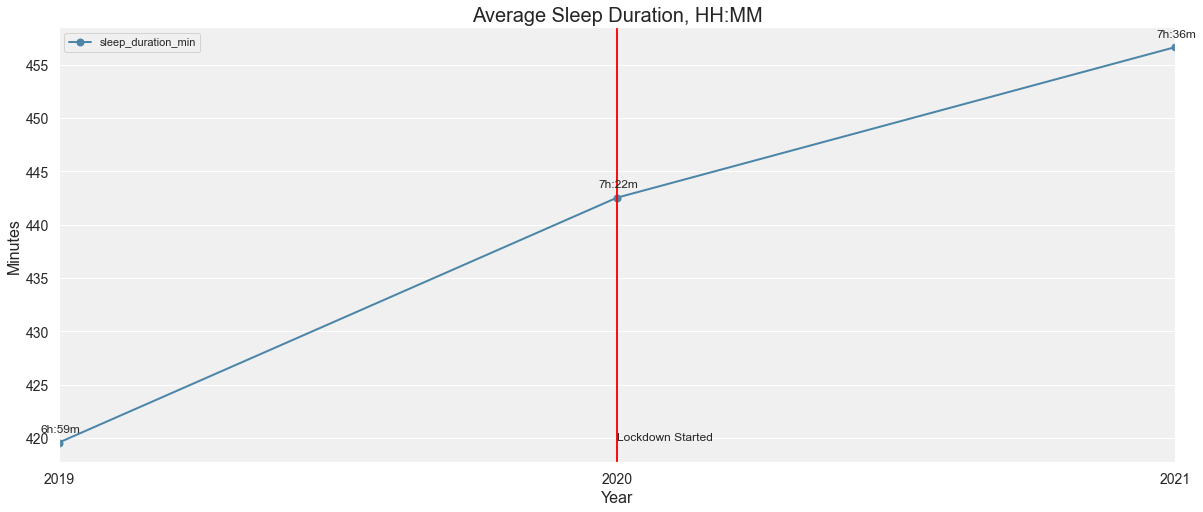

In [38]:
# Resample the average scores to be yearly
sleep_duration_y = df.resample('Y').mean()[["sleep_duration_min"]].round(2)

# Plot average sleep score
plot_line(
    sleep_duration_y,
    xlabel="Year",
    ylabel="Minutes",
    title="Average Sleep Duration, HH:MM", convert_to_hours=True
    )

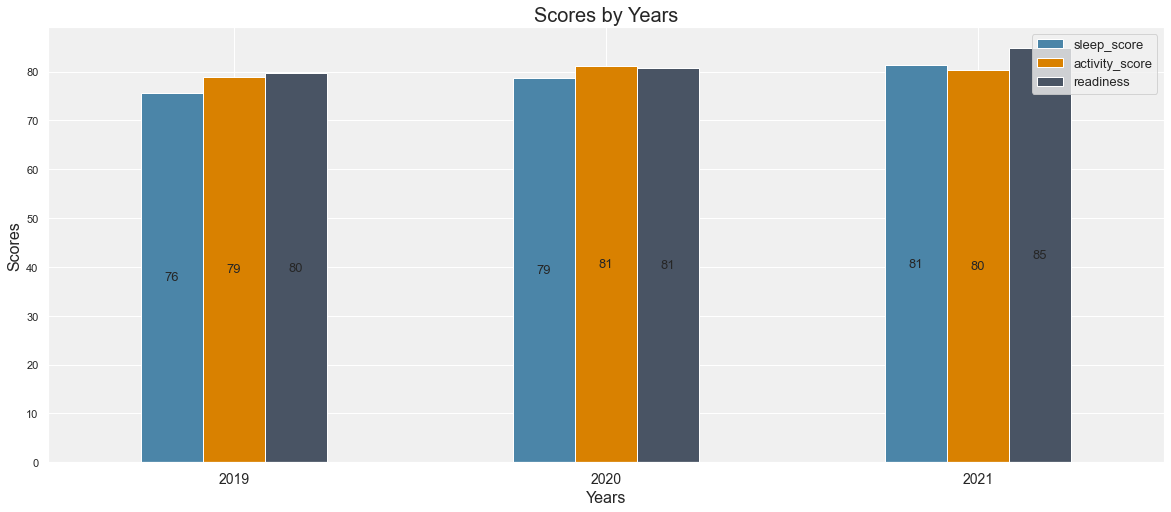

In [39]:
# Resample the average score to be yearly
scores_by_years = df.resample('Y').mean()[[
                                  'sleep_score',
                                  'activity_score',
                                  'readiness'
                                  ]]

# Plot scores by years
plot_bar(
    scores_by_years,
    xlabel='Years', ylabel="Scores",
    title="Scores by Years", period="%Y"
    )


The data contains information for three years: 2019, 2020, and 2021. But the number of days with available data varies across these years, __with 70 days for 2019, 327 days for 2020, and 50 days for 2021__ can impact the overall analysis and interpretation. Due to this data distribution, a Yearly Analysis might not provide a comprehensive and expected view of sleep patterns. 

# Monthly 

In [40]:
# Resample the data to monthly frequency and calculate the mean for each month
df_m = df.resample('M').mean().round(0)


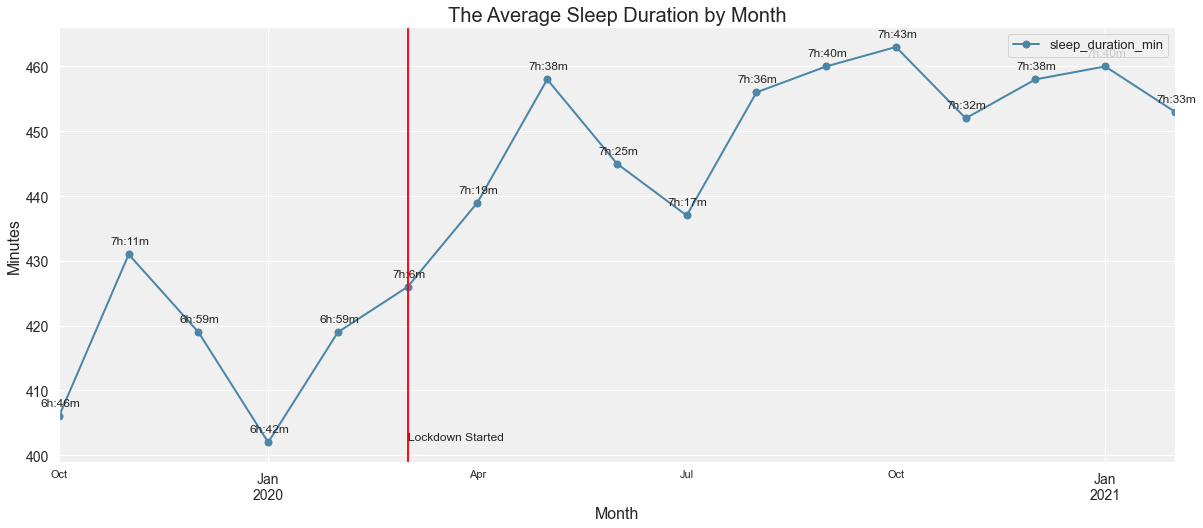

In [41]:
# Plot the average percentage of deep sleep monthly
plot_line(
    df_m[["sleep_duration_min"]],
    xlabel="Month",
    ylabel="Minutes",
    title="The Average Sleep Duration by Month",
    convert_to_hours=True
    )


On the line graph, we can observe the average sleep duration by month. At a glance, we can see that the average sleep duration increased after the Lockdown. From above, we know that the overall average sleep duration is 440 minutes or 7h:20m . __Before Lockdown__, the average sleep duration was slightly lower at 417 minutes or about __6h:57m__. __After Lockdown__ the average sleep duration increased to 450 minutes, or __7h:30m__, indicating a sleep increase of 33 minutes. 

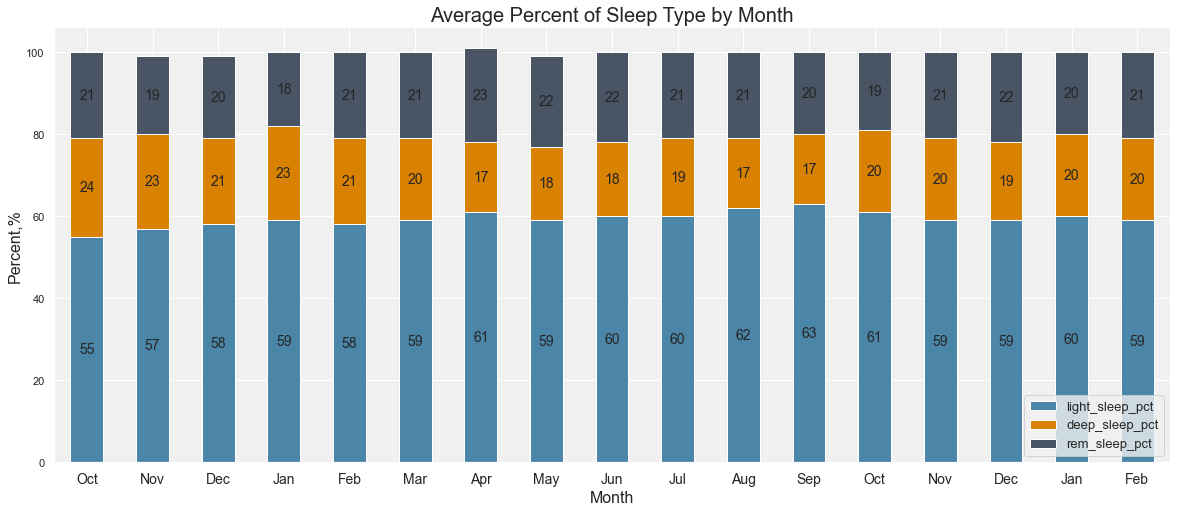

In [42]:
# Plotting the average sleep duration of different sleep types over months
sleep_dur_m = df_m[["light_sleep_pct","deep_sleep_pct","rem_sleep_pct"]]

ax = sleep_dur_m.plot.bar(stacked=True, color=color[0:3])

# Set x-axis and y-axis tick labels
ax.set_xticklabels(sleep_dur_m.index.strftime("%b"),
                   rotation=0,
                   fontsize=14)


# Set labels and legend
ax.set_xlabel("Month", fontsize=16)
ax.set_ylabel("Percent,%", fontsize=16)
ax.set_title("Average Percent of Sleep Type by Month", fontsize=20)

ax.legend(loc="lower right")
plt.rc("legend", fontsize=13)

# Patches is everything inside of the chart
for rect in ax.patches:
    
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the data value and can be used as the label
    label_text = int(height)
    

    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # Plotting only when height is greater than the specified value
    if height > 0:
        ax.text(label_x, label_y,
                label_text, ha='center',
                va='center', fontsize=14)

- Light Sleep appears to be consistently forming the majority of sleep duration, ranging from 55% to 63%. There seems to be a slight upward trend, especially After Lockdown in March 2020.


- Deep Sleep percentages vary between __17% and 24%.__ There is a  decrease After Lockdown, dropping to as low as 17%, which could indicate a potential impact of the Lockdown on sleep quality.


- The REM Sleep percentages range between __18% and 23%__, showing a relatively stable pattern, with a slight increase After Lockdown.


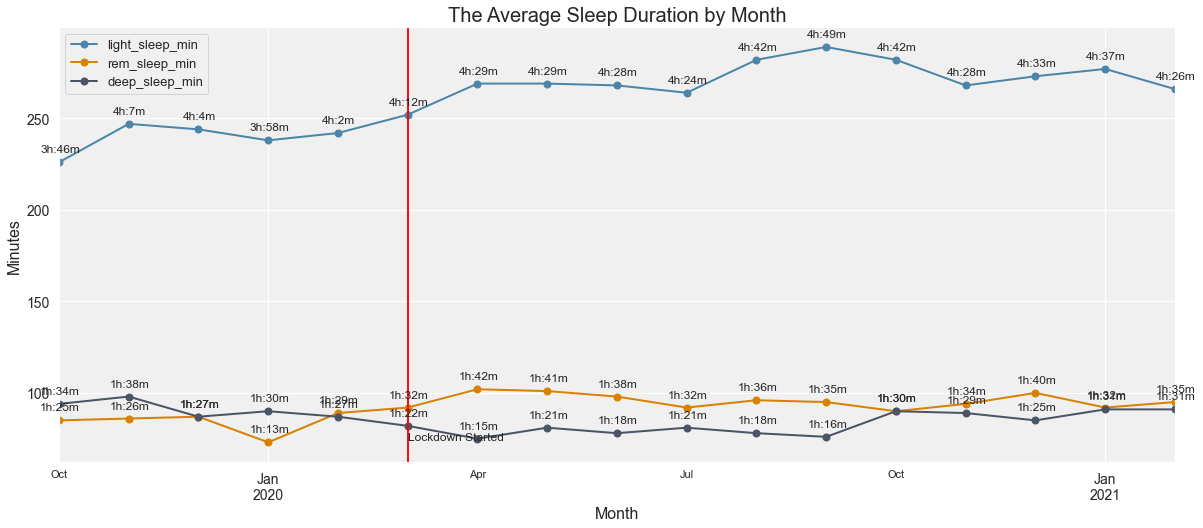

In [43]:
# Plot the average percentage of deep sleep monthly
plot_line(
    df_m[['light_sleep_min', 'rem_sleep_min',
       'deep_sleep_min']],
    xlabel="Month",
    ylabel="Minutes",
    title="The Average Sleep Duration by Month",
    convert_to_hours=True
    )

- There is some increase in Light Sleep duration After the Lockdown. Light Sleep duration begins at around 226 minutes (3h:46m) per night Before Lockdown (October 2019). It rose to about 289 minutes (4h:49m) per night by September 2020, After Lockdown.


- Conversely, there is a decrease in Deep Sleep duration from the onset of the Lockdown. Before the Lockdown, Deep Sleep duration was 94 minutes (1h:34m) per night (October 2019), which decreased to 76 minutes (1h:16m) per night by September 2020, After Lockdown.


- Before the Lockdown, REM Sleep was 85 minutes (1h:25m) per night (October 2019). After the Lockdown, this trend went upward, reaching an average of 102 minutes (1h:42m) in April 2020.

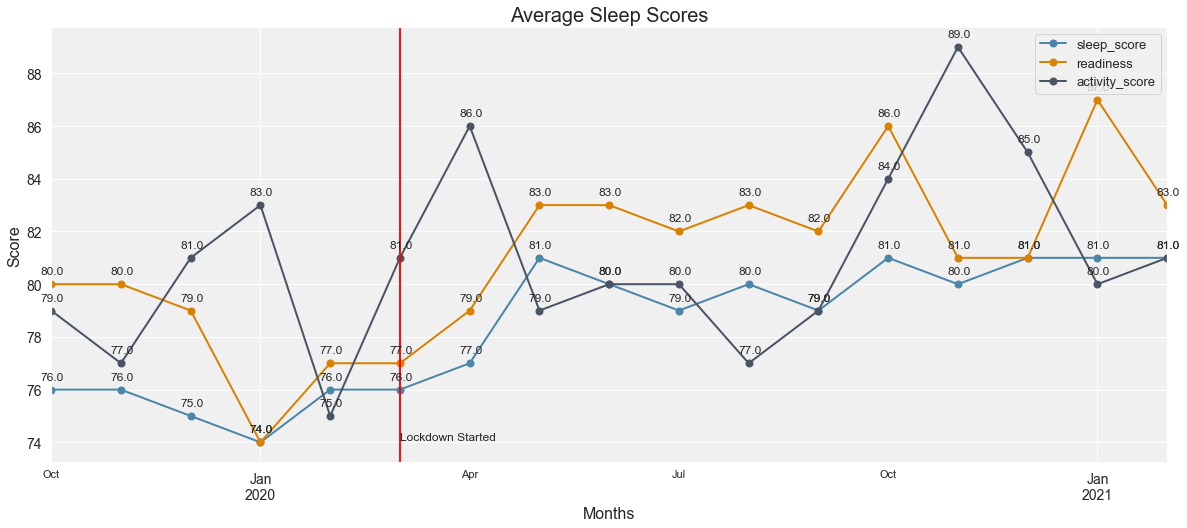

In [44]:
# Plot the average scores lines plot
plot_line(
    (df_m[["sleep_score", "readiness", "activity_score"]]).round(1),
    xlabel="Months",
    ylabel="Score",
    title="Average Sleep Scores"
    )


- The average __Sleep Score__ seems to have improved After the Lockdown. Before the Lockdown (from October 2019 to February 2020), the Sleep Score was consistently in the 'Good' range (74-76). However, starting from March 2020, the Sleep Score slightly improved and mainly remained in the 'Good' range with occasional reach into the 'Optimal' range (score of 81 or above), especially from May 2020 onwards.


- __Readiness Score__ showed improvement After Lockdown. Before  Lockdown, the Readiness Score was in the 'Good' range (74-80). However, After Lockdown, this score has consistently remained in the 'Optimal' range (above 80), indicating an improved Readiness state over time. The highest average Readiness score was 87 in January 2021.


- The __Activity Score__ fluctuated but generally remained in the 'Good' to 'Optimal' range throughout the observed period. There is a noticeable upward trend in Activity Score After Lockdown, reaching a peak of 89 in November 2020.

All Scores seemed to improve After Lockdown, according to the lines plot.

_Analysis amount of steps_

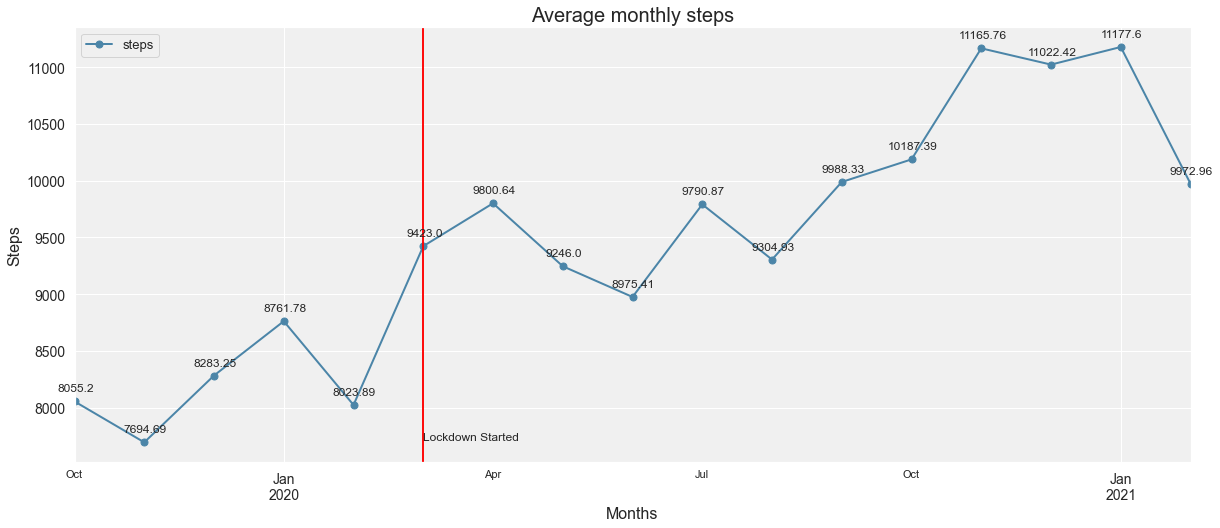

In [45]:
# Plot average steps in months
average_steps_by_months = df.resample('M').mean()[['steps']].round(2)

# Use plot_line function for plotting 
plot_line(average_steps_by_months, xlabel = "Months", ylabel = "Steps", title = "Average monthly steps")

- __Before the Lockdown__, the average number of steps was between __7,695 (November 2019) and 8,762__ (January 2020). This suggests a moderate level of physical activity during this period.


- __After the Lockdown__ there is a noticeable increase in the average number of steps. The average steps peaked at 11,178 in January 2021. Even the lowest value in this period (in June 2020, with an average of 8,975 steps) is higher than the maximum value Before the Lockdown.

_________

# WEEKDAYS

In [46]:
# Define the desired order of weekdays
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Convert weekdays column to Categorical data type with the specified order
df['weekdays'] = pd.Categorical(df['weekdays'], categories=weekday_order, ordered=True)

In [47]:
# Group the average sleep duration by weekdays
sleep_weekdays = df.groupby('weekdays')[
                 'sleep_duration_min'].mean().sort_values(ascending=True)

# Group the average sleep duration by weekdays before lockdown
sleep_before = df_before_lockdown.groupby('weekdays')['sleep_duration_min'].mean().sort_values(
                ascending=False)

# Group the average sleep duration by weekdays after lockdown
sleep_after = df_after_lockdown.groupby(
              'weekdays')['sleep_duration_min'].mean().sort_values(
               ascending=False)

In [48]:
# Concatenate all dataframes in one
sleep_weekdays_merge = pd.concat([
                         sleep_weekdays,
                         sleep_before,
                         sleep_after], axis=1)

sleep_weekdays_merge = sleep_weekdays_merge.set_axis([
                         'sleep_duration_all_period',
                         'sleep_duration_before_lockdown',
                         'sleep_duration_after_lockdown'],
                          axis='columns')
# Sort the DataFrame by weekday_order
sleep_weekdays_merge = sleep_weekdays_merge.reindex(weekday_order)

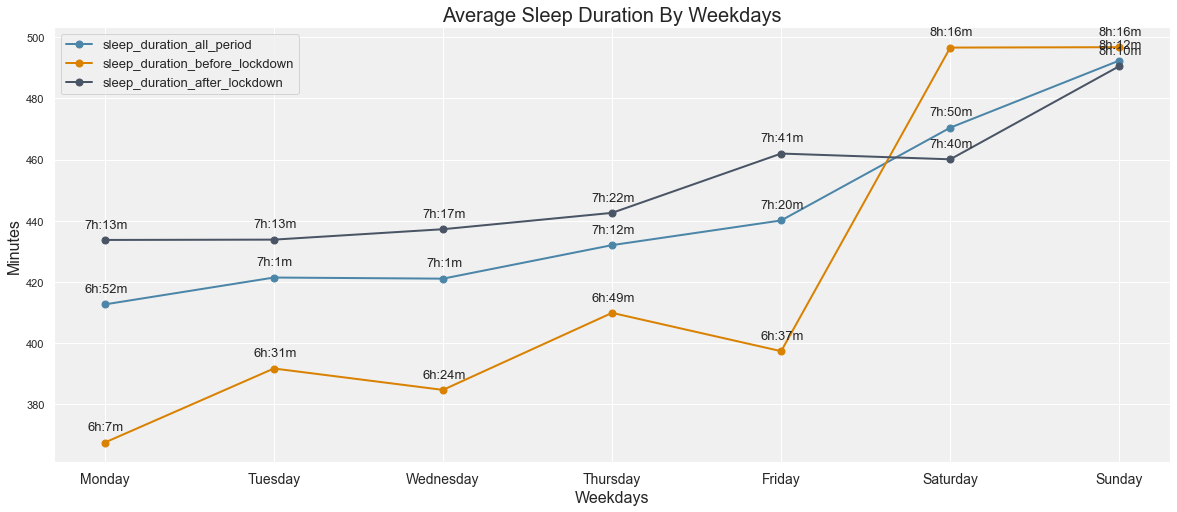

In [49]:
# Plot the average steps duration by weekdays before and after lockdown
ax = sleep_weekdays_merge.plot.line(marker='o', markersize=7, linewidth=2, color = color[0:3])

# Set labels and legend
ax.set_xticks(range(len(sleep_weekdays_merge)))
ax.set_xticklabels(sleep_weekdays_merge.index, rotation=0, fontsize=14)
ax.set_xlabel("Weekdays", fontsize=16)
ax.set_ylabel("Minutes", fontsize=16)
ax.set_title("Average Sleep Duration By Weekdays", fontsize=20)

ax.legend(loc='best')
plt.rc('legend', fontsize=13)

# Add labels to the data points
for i, col in enumerate(sleep_weekdays_merge.columns):
    for x, y in enumerate(sleep_weekdays_merge[col]):
        label_text = f"{converting_minutes_to_hours(y)}"

        ax.annotate(label_text, (x, y), textcoords='offset points', 
                    xytext=(1,12), ha='center', fontsize=13)

plt.show()

In [50]:
# Calculate average sleep duration for Weekday Before Lockdown
weekday_before_avg_sleep = df_before_lockdown.loc[df_before_lockdown.index.weekday < 5, 'sleep_duration_min'].mean()

# Calculate average sleep duration for Weekdays After Lockdown
weekday_after_avg_sleep = df_after_lockdown.loc[df_after_lockdown.index.weekday < 5, 'sleep_duration_min'].mean()

# Calculate average sleep duration for Weekend Before Lockdown
weekend_before_avg_sleep = df_before_lockdown.loc[df_before_lockdown.index.weekday >= 5, 'sleep_duration_min'].mean()

# Calculate average sleep duration for Weekend After Lockdown
weekend_after_avg_sleep = df_after_lockdown.loc[df_after_lockdown.index.weekday >= 5, 'sleep_duration_min'].mean()

print("Average Sleep Duration:")
print("Weekday Before Lockdown:", converting_minutes_to_hours(weekday_before_avg_sleep))
print("Weekday After Lockdown:", converting_minutes_to_hours(weekday_after_avg_sleep))
print("Weekend Before Lockdown:", converting_minutes_to_hours(weekend_before_avg_sleep))
print("Weekend After Lockdown:", converting_minutes_to_hours(weekend_after_avg_sleep))


Average Sleep Duration:
Weekday Before Lockdown: 6h:30m
Weekday After Lockdown: 7h:21m
Weekend Before Lockdown: 8h:16m
Weekend After Lockdown: 7h:55m


- The average Sleep Duration increases from Monday to Sunday, with Sunday having the most extended sleep duration (492 minutes or 8h:12m ). Monday has the shortest Sleep Duration (412 minutes or 6h:52m). This shows the longer sleep duration on weekends compared to weekdays.


- Like the entire period, the Sleep Duration increases from Monday to Sunday Before Lockdown. However, there is an exciting observation that Sleep Duration on the weekends is more extended than on weekdays. The most prolonged sleep duration is on Sunday (496 minutes or 8h:16m), and the shortest is on Monday (367 minutes or 6h:7m).


- The pattern of Sleep Duration changes slightly After the Lockdown. The Sleep Duration still increases from Monday to Friday. Still, it then decreases on the weekend, with the most extended sleep duration observed on Friday (462 minutes or  7h:42m) and the shortest on Monday (434 minutes or 7h:14m).

The line plot shows that the Lockdown has had a noticeable effect on sleep patterns. Specifically, the average sleep duration has increased on weekdays after the Lockdown, from 6h:30m before the Lockdown to 7h:21m After the Lockdown. 
On the other hand, the Sleep Duration on weekends decreased After the Lockdown, from an average of 8h:16m Before the Lockdown to 7h:55m After the Lockdown. This could mean reducing the difference between weekday and weekend routines during the Lockdown.

In [51]:
# Group the average steps amount by weekdays
steps_by_weekdays = df.groupby('weekdays')['steps'].mean().sort_values(ascending=False)

# Group the average steps amount by weekdays before lockdown
steps_weekdays_before = df_before_lockdown.groupby('weekdays')['steps'].mean().sort_values(ascending=False)

# Group the average steps amount by weekdays after lockdown
steps_weekdays_after = df_after_lockdown.groupby('weekdays')['steps'].mean().sort_values(ascending=False)

# Concatenate the three datasets into one
avg_steps_weekdays = pd.concat([steps_by_weekdays, steps_weekdays_before, steps_weekdays_after], axis=1).round(1)
avg_steps_weekdays.columns = ['whole_time', 'before_lockdown', 'after_lockdown']

# Reorder the rows based on the specified weekday order
avg_steps_weekdays = avg_steps_weekdays.reindex(weekday_order)

print(avg_steps_weekdays)


           whole_time  before_lockdown  after_lockdown
weekdays                                              
Monday         8657.5           8765.1          8607.2
Tuesday        8257.0           7398.7          8614.6
Wednesday      8618.5           7015.0          9331.2
Thursday       9217.6           7521.0         10025.5
Friday        10179.3           8685.5         10943.5
Saturday      10700.8           9207.4         11291.3
Sunday        10853.3           8583.1         11803.6


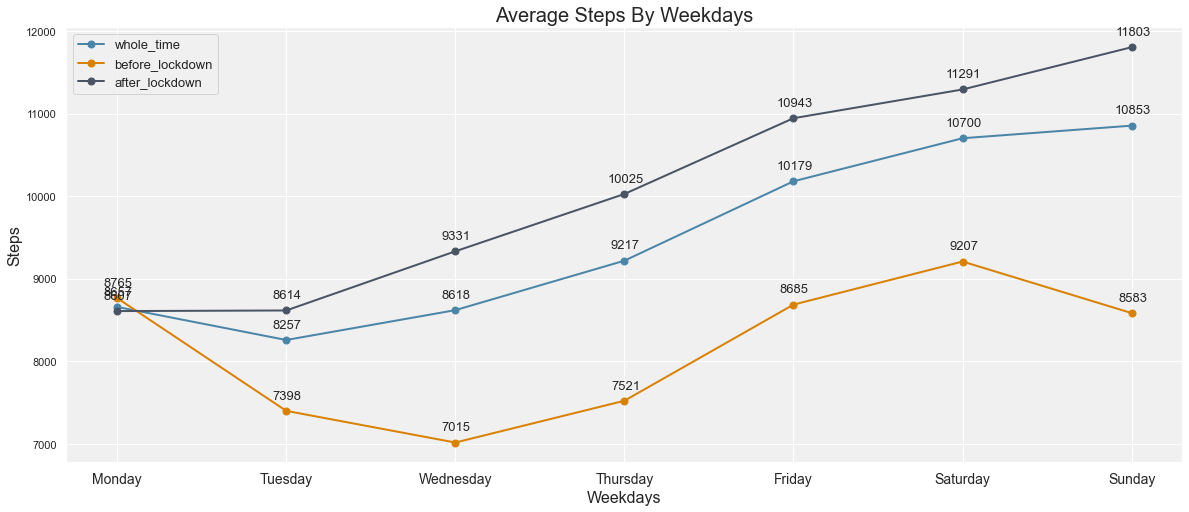

In [52]:
# Plot the average steps duration by weekdays before and after lockdown
ax = avg_steps_weekdays.plot.line(marker='o', markersize=7, linewidth=2,color = color[0:3])

# Set labels and legend
ax.set_xticks(range(len(avg_steps_weekdays)))
ax.set_xticklabels(avg_steps_weekdays.index, rotation=0, fontsize=14)
ax.set_xlabel("Weekdays", fontsize=16)
ax.set_ylabel("Steps", fontsize=16)
ax.set_title("Average Steps By Weekdays", fontsize=20)

ax.legend(loc='best')
plt.rc('legend', fontsize=13)

# Add labels to the data points
for i, col in enumerate(avg_steps_weekdays.columns):
    for x, y in enumerate(avg_steps_weekdays[col]):
        label_text = f"{int(y)}"

        ax.annotate(label_text, (x, y), textcoords='offset points', xytext=(1,12), ha='center', fontsize=13)

plt.show()


- Data shows an __increase in the number of Steps taken After the Lockdown across all weekdays.__ This could be due to increased awareness about the importance of physical activity during the Lockdown or to changes in daily habits that provide more possibilities for walking.


- The __increase__ in Steps is more noticeable during the weekends (__Saturday and Sunday__) After the Lockdown. This could be due to more free time to engage in physical activities or attempts to compensate for reduced movement during the weekdays.


- __Thursday__ increased from an average of __7521 Steps__ Before the lockdown to __10025.5 Steps__ After the Lockdown, a significant increase compared to other days.


- Before the Lockdown, __Tuesday__ seems to have been __the least active day__, changing to Monday After the Lockdown. 
The exact reasons behind these trends may be individual-specific. They could be related to changes in work-from-home schedules, increased focus on health and exercise during Lockdown, or simply more time for walking. 

------------

## Summary


- The numbers show that he had enough sleep duration, which equals __7 hours 21 minutes__. But after lockdown (15th March 2020), his sleep increased up to __7 hours 31 minutes.__


- But if we would compare average sleep duration before and after lockdown, then average sleep duration increases from 6 hours 57 minutes up to __7 hours 31 minutes (8.15%)__.


- The interesting thing is that REM sleep increased with the sleep duration after lockdown. However, deep sleep decreased after lockdown.


- Here we judge the activity of a person by the number of steps per day. The average daily number of steps is 9463. Before lockdown, the average number was __8151 steps.__ But after the lockdown, the average number of steps increased up to __10029 steps.__


- The most active day is Sunday. That might be connected to the person's extended sleep on Sunday. But the correlation between sleep duration and steps is __0.18__, which is not significant.




## Recommendations
- Establishing a consistent sleep schedule __by going to sleep and waking up at the same time every day__, regardless of the day of the week, offers several benefits. It helps regulate your internal clock, promotes better sleep quality, and improves overall health.


- Aim __sleep duration of 7.5 to 8 hours each night__. This range allows for sufficient rest and prevents the accumulation of fatigue, reducing the temptation to oversleep on weekends. 


- __Regular Exercise.__ Data indicate a weak positive correlation between the number of daily steps and several sleep quality indicators. Regular walks or other physical activity can help promote better sleep, readiness, and overall well-being.


- __Limit Coffee and Alcohol.__ While specific data on coffee and alcohol intake were not included in this project, both substances are known to interfere with sleep quality. Moderation is key.


- __Turn off Electronic Devices before Bedtime__ The blue light emitted by screens can interfere with your sleep. Try to switch off all devices at least an hour before you plan to sleep.


- __Monitor Deep Sleep Duration__ The data shows a slight negative correlation between the number of steps taken and deep sleep duration. While regular physical activity is crucial, it's also important to ensure that it does not interfere with the quality of deep sleep. Make adjustments as needed to ensure a balance.



- Remember, finding the proper bedtime and wake-up time may __require trial and error__ to determine what works best for your needs. Pay attention to how you feel in the morning and throughout the day to gauge whether you are getting adequate rest. 



## Limitations 
- __Sample Size and Selection:__  This project is centered around a single individual's sleep patterns, which significantly limits the scope of the results. It is important to remember that sleep habits and activity levels can differ among individuals. Conclusions drawn from a single individual's __data may not be relevant to larger populations__ with diverse backgrounds and contexts.


- __Limited Data:__ This project only covers 2019-2021, which may not be suitable to draw reliable conclusions, especially when comparing these years. Findings about trends over time might be skewed or incomplete due to gaps in the data.


- __Lack of Contextual Data:__ Data regarding the individual's consumption of coffee and alcohol could potentially explain the observed changes in Deep Sleep and REM sleep duration. Factors such as dietary habits, exercise routine, stress levels, work schedule, and environment can significantly impact sleep quality and quantity. Without this information, it's challenging to pinpoint specific causes for changes in sleep patterns.

______